In [22]:
import numpy as np
from astropy import units as u
from astropy import constants as c
from random import choice
from astropy.table import Table
from astropy.io import fits
from trilegal_bgd_flux import background_flux
from background_per_pix import miris_bgd_flux#, glon_glat_1
from astropy import visualization
import matplotlib.pyplot as plt
#plt.style.use('dark_background')

In [1]:
import glob
import numpy as np
from astropy import wcs
import astropy.units as u
from astropy.io import fits
from astropy.table import Table
import pandas

name1 = glob.glob('gc_*.fits')
name2 = [fits.getdata(x) for x in name1]

headers = []
for ii in range(3):
    headers.append(fits.getheader(name1[ii]))
ww = [wcs.WCS(headers[0]), wcs.WCS(headers[1]), wcs.WCS(headers[2])]

indices = [[],[],[]]
glon_glat_1 = []
glon_glat_2 = []
glon_glat_3 = []
for ii in range(9142):
    for jj in range(6202):
        if not np.isnan(name2[0][ii][jj]):
            indices[0].append([ii,jj])
            ra1, dec1 = ww[0].wcs_pix2world(ii,jj,0)
            glon_glat_1.append([ra1, dec1])
        if not np.isnan(name2[1][ii][jj]):
            indices[1].append([ii,jj])
            ra1, dec1 = ww[1].wcs_pix2world(ii,jj,0)
            glon_glat_2.append([ra1, dec1])
        if not np.isnan(name2[2][ii][jj]):
            indices[2].append([ii,jj])
            ra1, dec1 = ww[2].wcs_pix2world(ii,jj,0)
            glon_glat_3.append([ra1, dec1])
df = pandas.DataFrame([glon_glat_1, glon_glat_2, glon_glat_3])
df.to_csv('miris_coords.csv')

# 6/14/2021 New Data

In [2]:
glon_and_glat = [(2.5, 0.1), (2.5, 1), (2.5, 2), (2.5, 3), (2.5, -1), 
                (-2.5, 0.1), (-2.5, 1), (-2.5, 2), (-2.5, 3), (-2.5, -1),
                (-1.5, 0.1), (-1.5, 1), (-1.5, 2), (-1.5, 3), (-1.5, -1),
                (1.5, 0.1), (1.5, 1), (1.5, 2), (1.5, 3), (1.5, -1),
                (0, 0.1), (0, 1), (0, 2), (0, 3), (0, -1),
                (5.0, 0.1), (5.0, 1), (5.0, 2), (5.0, 3), (5.0, -1),
                (-5.0, 0.1), (-5.0, 1), (-5.0, 2), (-5.0, 3), (-5.0, -1),
                (-10.0, 0.1), (-10.0, 1), (-10.0, 2), (-10.0, 3), (-10.0, -1),
                (-20.0, 0.1), (-20.0, 1), (-20.0, 2), (-20.0, 3), (-20.0, -1),
                (-30.0, 0.1), (-30.0, 1), (-30.0, 2), (-30.0, 3), (-30.0, -1),
                (-40.0, 0.1), (-40.0, 1), (-40.0, 2), (-40.0, 3), (-40.0, -1),
                (-50.0, 0.1), (-50.0, 1), (-50.0, 2), (-50.0, 3), (-50.0, -1),
                (-60.0, 0.1), (-60.0, 1), (-60.0, 2), (-60.0, 3), (-60.0, -1),
                (270.0, 0.1), (270.0, 1), (270.0, 2), (270.0, 3), (270.0, -1),
                (240.0, 0.1), (240.0, 1), (240.0, 2), (240.0, 3), (240.0, -1),
                (210.0, 0.1), (210.0, 1), (210.0, 2), (210.0, 3), (210.0, -1),
                (180.0, 0.1), (180.0, 1), (180.0, 2), (180.0, 3), (180.0, -1),
               ]

In [3]:
table_f = miris_bgd_flux(glon_and_glat)

http://stev.oapd.inaf.it/tmp/output402310679274.dat
http://stev.oapd.inaf.it/tmp/output918466587158.dat
http://stev.oapd.inaf.it/tmp/output704689032704.dat
http://stev.oapd.inaf.it/tmp/output22578510529.dat
http://stev.oapd.inaf.it/tmp/output486414661704.dat
http://stev.oapd.inaf.it/tmp/output397121733361.dat
http://stev.oapd.inaf.it/tmp/output955992939257.dat
http://stev.oapd.inaf.it/tmp/output222350779063.dat
http://stev.oapd.inaf.it/tmp/output426341821513.dat
http://stev.oapd.inaf.it/tmp/output450046621336.dat
http://stev.oapd.inaf.it/tmp/output473198545239.dat
http://stev.oapd.inaf.it/tmp/output754631613222.dat
http://stev.oapd.inaf.it/tmp/output419396494123.dat
http://stev.oapd.inaf.it/tmp/output663530991952.dat
http://stev.oapd.inaf.it/tmp/output400343880131.dat
http://stev.oapd.inaf.it/tmp/output238816984769.dat
http://stev.oapd.inaf.it/tmp/output956054355324.dat
http://stev.oapd.inaf.it/tmp/output763752756946.dat
http://stev.oapd.inaf.it/tmp/output38854855186.dat
http://stev.oa

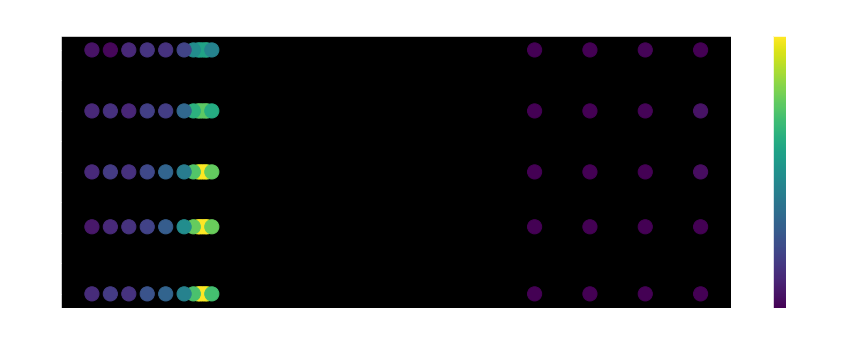

In [25]:
fig, ax = plt.subplots(figsize=(15,5))
sc = ax.scatter(table_f['longitude'], table_f['latitude'], s=200, c=table_f['flux per pix'], norm=visualization.simple_norm(table_f['flux per pix'], stretch='asinh',
                                         max_percent=95, min_percent=15))
ax.set_ylabel('Galactic Latitude [Deg]', fontsize='20')
ax.set_xlabel('Galactic Longitude [Deg]', fontsize='20')
plt.title('Background Flux in the Galactic Plane', fontsize='30')
cbar = fig.colorbar(sc)
cbar.set_label("Flux per pixel [Jy]", fontsize='20')

# 6/11/2021 Old Data

In [ ]:
glons = []
glats = []
flux = []
for glon, glat in glon_and_glat:
               glons.append(glon)
               glats.append(glat)
               flux.append(background_flux(glon, glat))

In [ ]:
result = {}
result['longitude']= glons
result['latitude'] = glats
result['flux per pix'] = flux

table_m = Table(result)

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sc = ax.scatter(table_m['longitude'], table_m['latitude'], s=1000, c=table_m['flux per pix'])
ax.set_ylabel('Galactic Latitude [Deg]', fontsize='20')
ax.set_xlabel('Galactic Longitude [Deg]', fontsize='20')
plt.title('Background Flux in the Galactic Plane, m > 16', fontsize='30')
cbar = fig.colorbar(sc)
cbar.set_label("Flux per pixel [Jy]", fontsize='20')

# 9/23/2020 Old Data

In [2]:
models_table = Table.read('coelho14_model_paa.fits')

In [3]:
def value_keys(models_table):
    logg_values = []
    teff_values = []
    
    #creates a list of all of the possible logg and teff values
    #this makes matching quicker
    for value in models_table['logg']:
        if value not in logg_values:
            logg_values.append(value)
        
    for value in models_table['teff']:
        if value not in teff_values:
            teff_values.append(value)

    teff_dict = {"attribute": "effective temperature"}
    logg_dict = {"attribute": "surface gravity (log base 10)"}
    
    #this stores all of the indices for each teff and logg value in a dictionary
    #for easy access since those indices don't change from query to query
    for value in teff_values:
        indices = []
        for ii in range(len(models_table)):
            if models_table['teff'][ii] == value:
                indices.append(ii)
        teff_dict[f'value is {value}'] = indices
    
    for value in logg_values:
        indices = []
        for ii in range(len(models_table)):
            if models_table['logg'][ii] == value:
                indices.append(ii)
        logg_dict[f'value is {value}'] = indices

    return teff_dict, logg_dict, teff_values, logg_values

In [4]:
teff_dict, logg_dict, teff_values, logg_values = value_keys(models_table)

In [5]:
def correct_keys(jj, models_table, tbl):
    keys = []
    
    #this gives which teff and logg value the star is closest to
    init_min = np.argmin(np.abs(teff_values - tbl['teff'][jj]))
    teff_val = teff_values[init_min]
    init_min = np.argmin(np.abs(logg_values - tbl['logg'][jj]))
    logg_val = logg_values[init_min]
    
    #this gives the indices that correspond to that teff and logg value
    keys_teff = teff_dict[f'value is {teff_val}']
    keys_logg = logg_dict[f'value is {logg_val}']
    
    #this looks for any overlap between indices for teff and logg for a star
    for key in keys_teff:
        if key in keys_logg:
            keys.append(key)
    
    #if overlap can't be found, only the keys for teff are considered because that
    #seemed more important than prioriting logg
    #the choice function is to randomize which index is chosen 
    #since a lot of stars correspond to a particular teff logg combo
    if len(keys) == 0:
        index = choice(keys_teff)
    else:
        index = choice(keys)
    
    return index

In [6]:
def closest_model(name, VVV=False):
    """"
    This assumes that we value teff being correct over logg.
    Unfortunately, trying to find the best fit from existing data requires us to use a strict poset.
    So one has to be prioritized over the other.
    """
    data_stars = np.loadtxt('./TRILEGAL_data/' + name, unpack=True)
    
    logTe = []
    logg = []
    Av = []
    J = []
    H = []
    Ks = []
    
    zpt_J = 1594*u.Jy
    zpt_H = 1024*u.Jy
    zpt_Ks = 666.8*u.Jy
    
    index = 13
    
    #converting to the zeropoints for VVV
    if VVV:
        index += 2
        zpt_J -= 44.2*u.Jy
        zpt_H += 2.4*u.Jy
        zpt_Ks += 5.8*u.Jy
        
    zpts = Table({'J': [zpt_J],
                 'H': [zpt_H],
                 'Ks': [zpt_Ks],
                 'K': [zpt_Ks],
    })

    for ii in range(len(data_stars[0])):
        if data_stars[index, ii] >= 16:
            logTe.append(data_stars[5, ii])
            logg.append(data_stars[6, ii])
            Av.append(data_stars[8, ii])
            J.append(data_stars[index - 2, ii])
            H.append(data_stars[index - 1, ii])
            Ks.append(data_stars[index, ii])

    tbl = Table({'logTe': logTe,
                 'logg': logg,
                 'Av': Av,
                 'J': J,
                 'H': H,
                 'Ks': Ks,
                 })

    tbl.add_column(col=(10**tbl['logTe']), name='teff')
    
    data_rows = []
    #only keeping columns that seem relevant or interesting
    good_col = ['paa', 'paac_l', 'paac_h', 'J', 'H', 'K', 'fn']
    kept_col = ['Av', 'J', 'H', 'Ks']
    
    #faster way to make a table
    for jj in range(len(tbl)):
        #an index that prioritizes teff
        index = correct_keys(jj=jj, models_table=models_table, tbl=tbl)
        
        temp_dict = {}
        for hh in good_col:
            temp_dict[f'{hh} model'] = models_table[hh][index]
            
        for hh in kept_col:
            if hh is 'Av':
                temp_dict[f'{hh}'] = tbl[hh][jj]
                temp_dict['A_paa'] = np.round(0.15 * temp_dict['Av'], decimals=5)
            else:
                temp_dict[f'{hh} tril'] = tbl[hh][jj]
                temp_dict[f'{hh} flux tril'] = zpts[hh][0] * 10**(tbl[hh][jj] / -2.5)
        
        temp_dict['flux ratio'] = temp_dict['Ks flux tril'] / temp_dict['K model']
        temp_dict['f_paa'] = temp_dict['flux ratio'] * temp_dict['paa model']
        temp_dict['f_paac_l'] = temp_dict['flux ratio'] * temp_dict['paac_l model'] 
        temp_dict['f_paac_h'] = temp_dict['flux ratio'] * temp_dict['paac_h model'] 
        
        data_rows.append(temp_dict)
        
    result = Table(rows=data_rows)
    
    return result

In [7]:
def flux_per_pix(pixels, name, VVV=False):
    new_data = closest_model(name, VVV=VVV)
    dimmed_flux = new_data['f_paa'] * 10**(new_data['A_paa']/-2.5)
    total_flux = dimmed_flux.sum()
    fpp = total_flux / (pixels**2)
    return fpp

In [8]:
longs = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20']

In [9]:
data_m = []

for long in longs:
    temp_dict = {}
    temp_dict['longitude'] = long
    temp_dict['latitude'] = -0.5
    temp_dict['flux per pix'] = flux_per_pix(50, f'glat_n0p5_glon_{long}_m.dat')
    data_m.append(temp_dict)
    
for long in longs:
    temp_dict = {}
    temp_dict['longitude'] = long
    temp_dict['latitude'] = 0
    temp_dict['flux per pix'] = flux_per_pix(50, f'glat_0_glon_{long}_m.dat')
    data_m.append(temp_dict)
                  
for long in longs:
    temp_dict = {}
    temp_dict['longitude'] = long
    temp_dict['latitude'] = 0.5
    temp_dict['flux per pix'] = flux_per_pix(50, f'glat_0p5_glon_{long}_m.dat')
    data_m.append(temp_dict)
    
table_m = Table(rows=data_m)

In [ ]:
data_v = []
for long in longs:
    temp_dict = {}
    temp_dict['longitude'] = long
    temp_dict['latitude'] = -0.5
    temp_dict['flux per pix'] = flux_per_pix(50, f'glat_n0p5_glon_{long}_v.day', VVV=True)
    data_v.append(temp_dict)
    
for long in longs:
    temp_dict = {}
    temp_dict['longitude'] = long
    temp_dict['latitude'] = 0
    temp_dict['flux per pix'] = flux_per_pix(50, f'glat_0_glon_{long}_v.dat', VVV=True)
    data_v.append(temp_dict
    
for long in longs:
    temp_dict = {}
    temp_dict['longitude'] = long
    temp_dict['latitude'] = 0.5
    temp_dict['flux per pix'] = flux_per_pix(50, f'glat_0p5_glon_{long}_v.dat', VVV=True)
    data_v.append(temp_dict)
                  
table_v = Table(rows=data_v)

In [ ]:
data_v

In [82]:
table_m = Table(rows=data_m)

In [23]:
table_m

flux per pix,latitude,longitude
object,float64,str2
0.0014058476706164762 Jy,-0.5,0
0.0010438664073940658 Jy,-0.5,1
0.0007033561042593905 Jy,-0.5,2
0.0005001650158766503 Jy,-0.5,3
0.0003686970480296555 Jy,-0.5,4
0.00029141186671995437 Jy,-0.5,5
0.00023305914121358011 Jy,-0.5,6
0.00018678722221831292 Jy,-0.5,7
0.00015804255723349478 Jy,-0.5,8


In [83]:
table_m['flux per pix'] = table_m['flux per pix'].astype('U22').astype(float)
table_m['flux per pix'] = table_m['flux per pix'] * u.Jy

0.0014058476706164762
0.0010438664073940658
0.0007033561042593905
0.0005001650158766503
0.0003686970480296555
0.00029141186671995437
0.00023305914121358011
0.00018678722221831292
0.00015804255723349478
0.0001296941536887059
0.00011590641917768059


In [84]:
fn = 'background_flux_per_pix_2mass.fits'
table_m.write(fn, overwrite=True)

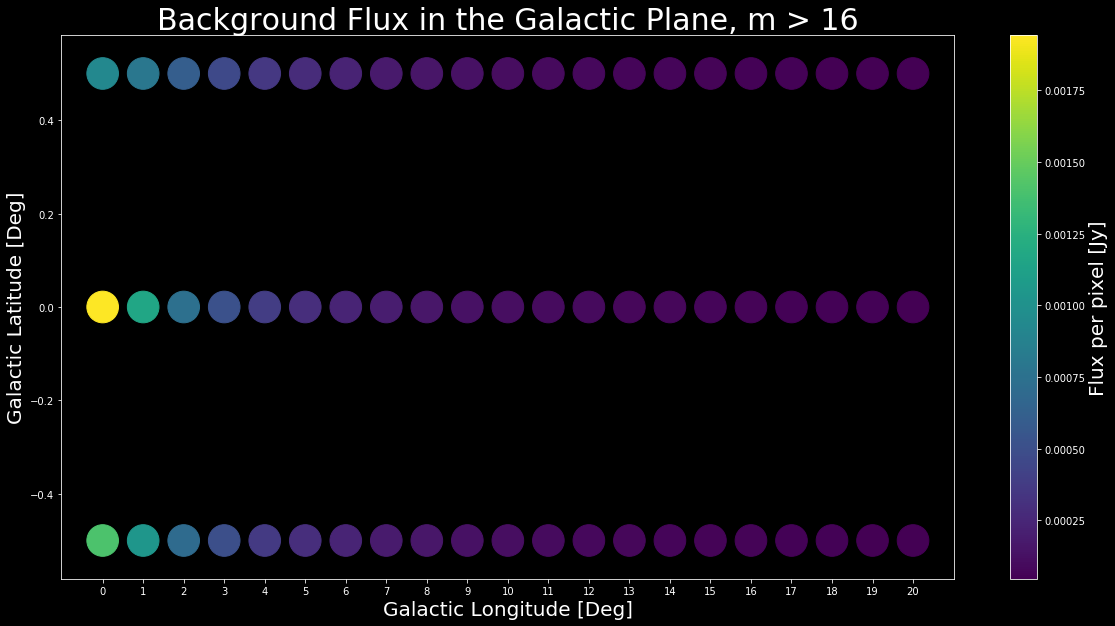

In [85]:
fig, ax = plt.subplots(figsize=(20,10))
sc = ax.scatter(table_m['longitude'], table_m['latitude'], s=1000, c=table_m['flux per pix'].quantity)
ax.set_ylabel('Galactic Latitude [Deg]', fontsize='20')
ax.set_xlabel('Galactic Longitude [Deg]', fontsize='20')
plt.title('Background Flux in the Galactic Plane, m > 16', fontsize='30')
cbar = fig.colorbar(sc)
cbar.set_label("Flux per pixel [Jy]", fontsize='20')
#plt.colorbar()